In [3]:
import trenchripper as tr

import copy

import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

dask_wd = "/home/de64/scratch/de64/dask"

plt.style.use('./deaton.mplstyle')

## Figure 3A

#### Load Checkpoint

In [4]:
time_range = (0,27)
time_step = 2
cell_cycle_time_range = (1,26)
cell_cycle_time_step = 2
ci_percentiles = (5,95)

values_to_rescale = ['Delta time (hr)','Septum Displacement Length Normalized','Instantaneous Growth Rate: Volume',\
                     'Length','Width','mCherry mean_intensity']
values_to_recale_dict = {'Cell Cycle':['Delta time (hr)','Septum Displacement Length Normalized'],\
                        'Timepoints':['Length','Width','mCherry mean_intensity'],\
                        'Growth':['Instantaneous Growth Rate: Volume']}
values_to_recale_inv_dict = {item:key for key,val in values_to_recale_dict.items() for item in val}
title_list = ["Interdivision Time (hr)","Septum Error (%)","Growth Rate (1/hr)",\
              "Length $(\mu m)$","Width $(\mu m)$","mKate2 Intensity (AU)"]
initial_timepoint_nsamples = 20000000
timepoint_nsamples_list = [100000,100000,100000,100000,100000,100000]

ttl_time_steps = ((time_range[1]-time_range[0])/time_step)+1
time_grid = np.linspace(time_range[0],time_range[1],num=int(ttl_time_steps))
cell_cycle_ttl_time_steps = ((cell_cycle_time_range[1]-cell_cycle_time_range[0])/cell_cycle_time_step)+1
cell_cycle_time_grid = np.linspace(cell_cycle_time_range[0],cell_cycle_time_range[1],num=int(cell_cycle_ttl_time_steps))
time_grid_dict = {'Cell Cycle':cell_cycle_time_grid,'Timepoints':time_grid,'Growth':time_grid}
mean_time_grid_dict = {key:(grid[1:]+grid[:-1])/2 for key,grid in time_grid_dict.items()}

with open("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/DE32_Imaging/timeseries_mean_data_checkpoint.pkl", 'rb') as infile:
    timeseries_mean_data_list = pkl.load(infile)
with open("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/DE32_Imaging/timeseries_std_data_checkpoint.pkl", 'rb') as infile:
    timeseries_std_data_list = pkl.load(infile)

#### Plot Timeseries
- Currently plotting raw data only

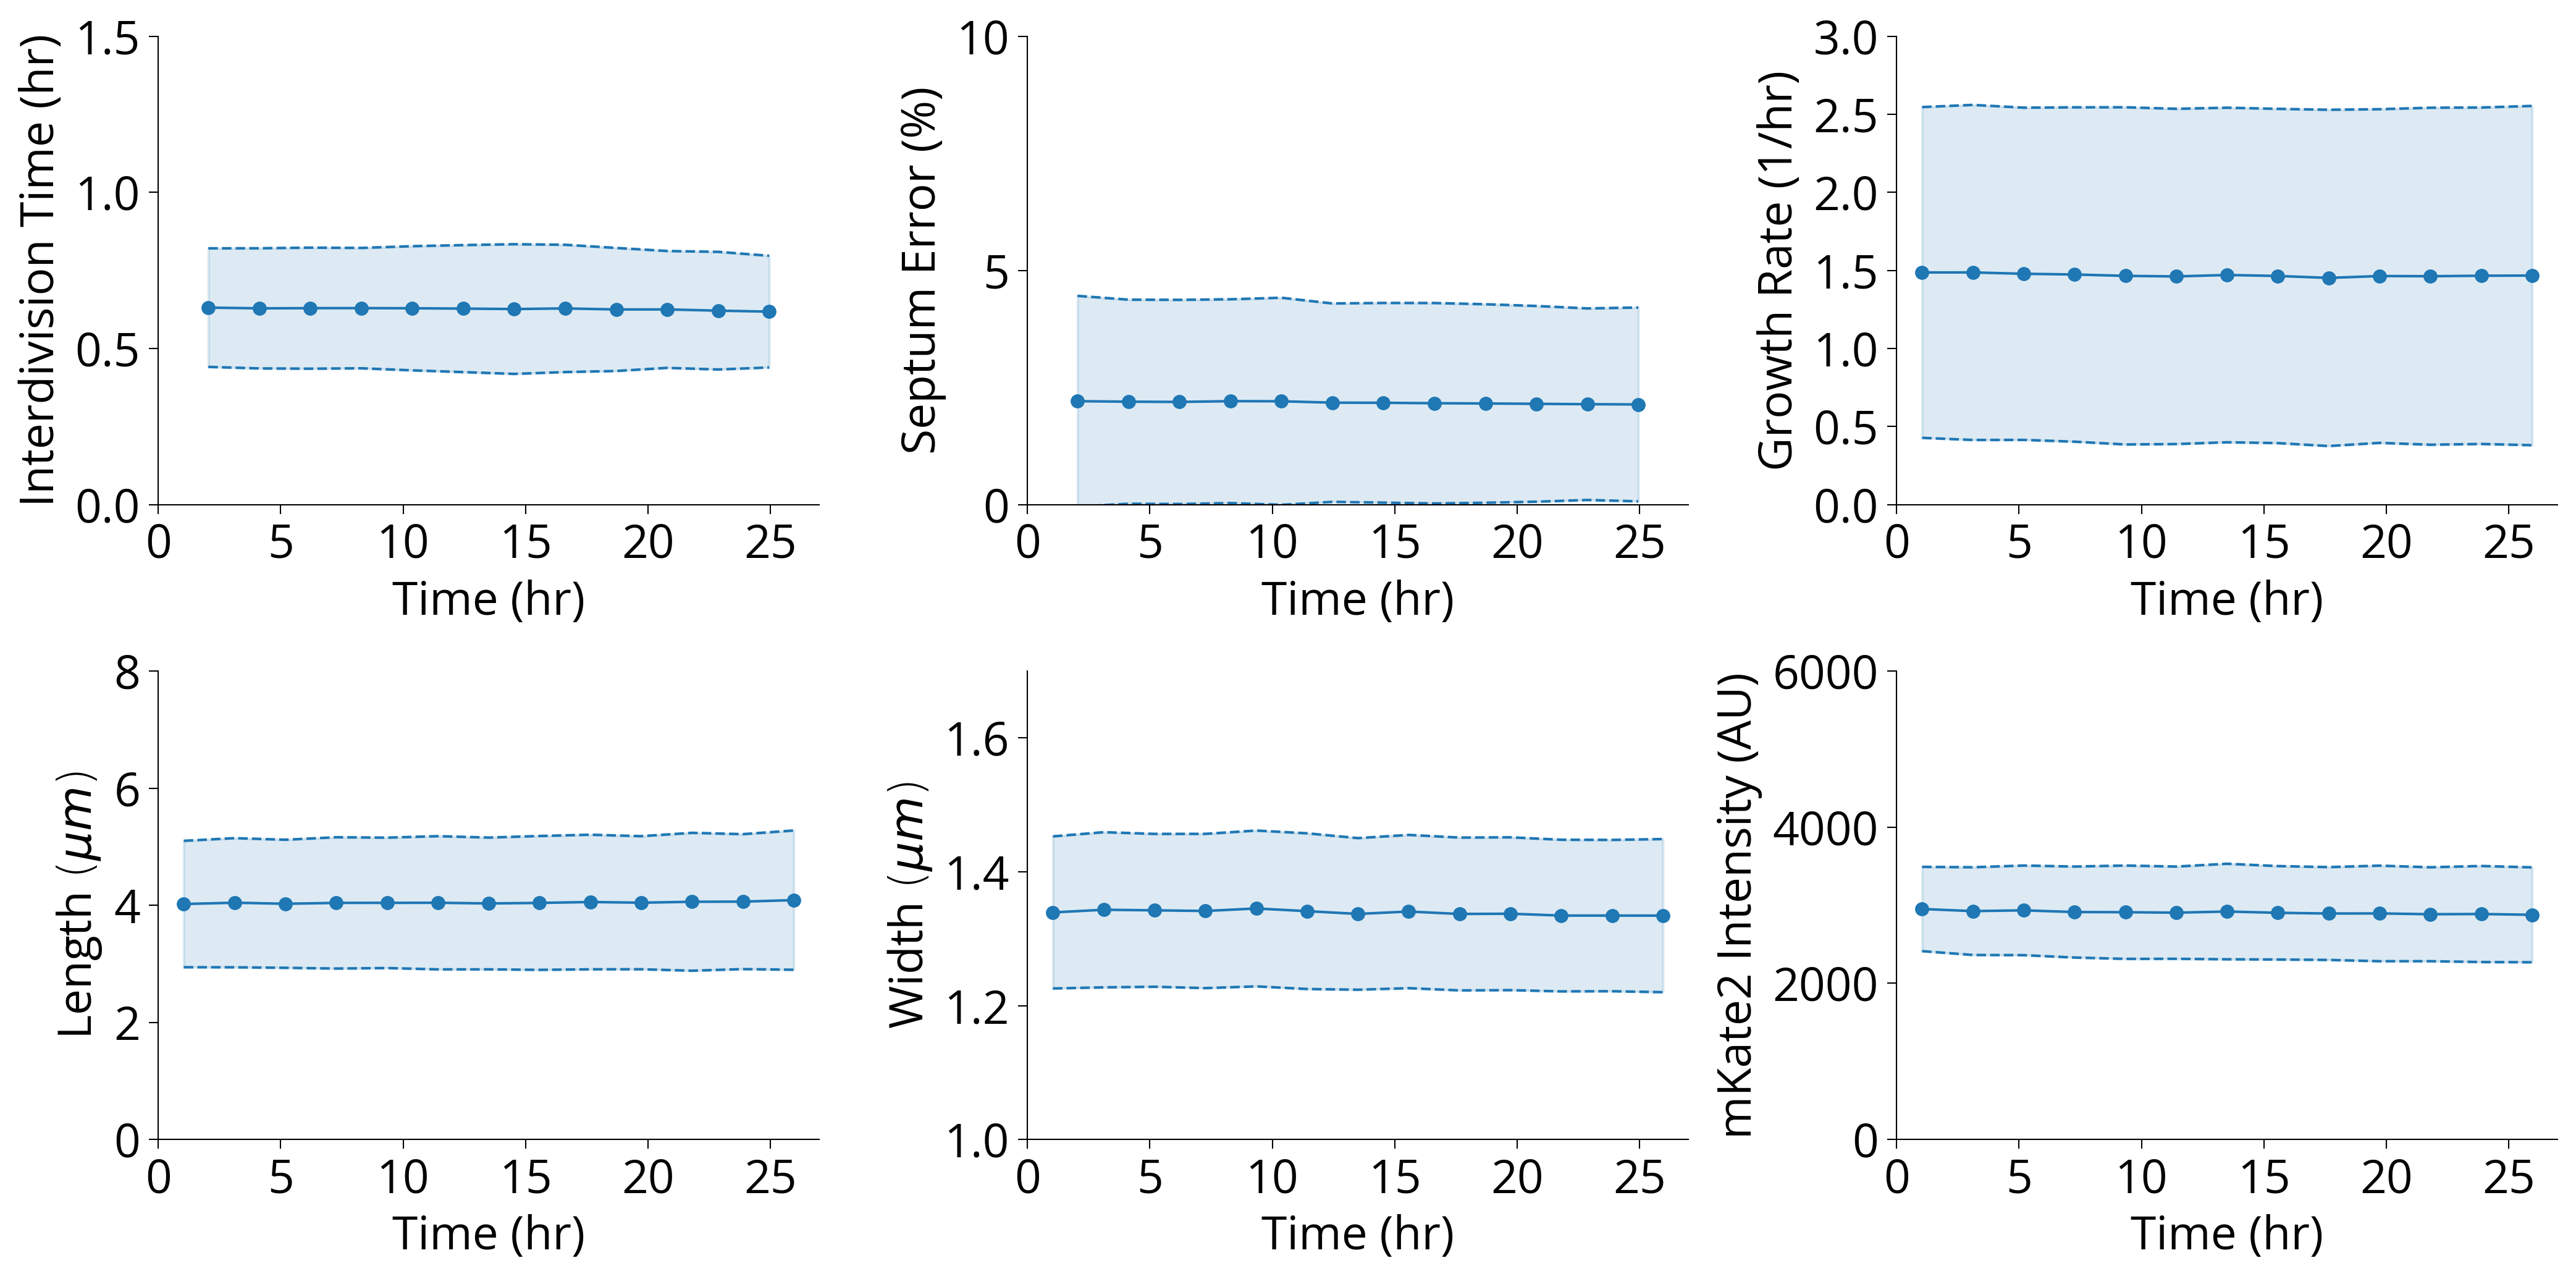

In [5]:
pheno_ranges = [(0,1.5),(0,0.12),(0,3),(0,8),(1,1.7),(0,6000)]
pheno_ticks = [[0.,0.5,1.0,1.5],[0.,5,10],[0.,0.5,1.0,1.5,2.,2.5,3.],\
               [0,2,4,6,8],[1,1.2,1.4,1.6],[0,2000,4000,6000]]
time_colors = ['tab:blue','tab:orange','tab:green']

nfig = plt.figure(figsize=(14,7))

for i,value in enumerate(values_to_rescale):
    df_label = values_to_recale_inv_dict[value]
    mean_time_grid = mean_time_grid_dict[df_label]    
    param_name = title_list[i]
    pheno_range = pheno_ranges[i]
    pheno_tick = pheno_ticks[i]

    plt.subplot(2,3,i+1)
    
    timeseries_mean_data = timeseries_mean_data_list[i]
    timeseries_std_data = timeseries_std_data_list[i]
        
    
    for color_i,key in enumerate(["Unscaled"]):
        mean_param_series = np.array(timeseries_mean_data[key])
        std_param_series = np.array(timeseries_std_data[key])
        if param_name == "Septum Error (%)":
            mean_param_series *= 100
            std_param_series *= 100

        plt.plot(mean_time_grid,mean_param_series,alpha=1,zorder=-15,color=time_colors[color_i])
        plt.scatter(mean_time_grid,mean_param_series,alpha=1,zorder=-14,color=time_colors[color_i],s=20)
        if color_i==0:
            plt.fill_between(mean_time_grid,mean_param_series-std_param_series,mean_param_series+std_param_series,\
                             alpha=0.15,zorder=-20,color=time_colors[color_i])
            
            plt.plot(mean_time_grid,mean_param_series-std_param_series,alpha=1,zorder=-15,color=time_colors[color_i],linestyle="--")
            plt.plot(mean_time_grid,mean_param_series+std_param_series,alpha=1,zorder=-15,color=time_colors[color_i],linestyle="--")

    plt.xlabel("Time (hr)", fontsize=18)
    plt.ylabel(title_list[i], fontsize=18)
    plt.xlim(time_range[0],time_range[1])
    plt.ylim(pheno_range[0],pheno_range[1])
    plt.yticks(pheno_tick,fontsize=18)
    plt.xticks([0,5,10,15,20,25],fontsize=18)
    sns.despine()
plt.tight_layout()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/S3/Param_Timeseries.png", dpi=300, transparent=True)

## Figure 3B

#### Load Checkpoint

In [6]:
values_to_rescale = ['Delta time (hr)','Septum Displacement Length Normalized','Instantaneous Growth Rate: Volume',\
                     'Length','Width','mCherry mean_intensity']
values_to_recale_dict = {'Cell Cycle':['Delta time (hr)','Septum Displacement Length Normalized'],\
                        'Timepoints':['Length','Width','mCherry mean_intensity'],\
                        'Growth':['Instantaneous Growth Rate: Volume']}
values_to_recale_inv_dict = {item:key for key,val in values_to_recale_dict.items() for item in val}
title_list = ["Interdivision Time (hr)","Septum Error (%)","Growth Rate (1/hr)",\
              "Length $(\mu m)$","Width $(\mu m)$","mKate2 Intensity (AU)"]
pheno_ranges = [(0,1.5),(0,0.12),(0,3),(0,8),(1,1.7),(0,6000)]
pheno_ticks = [[0.,0.5,1.0,1.5],[0.,5,10],[0.,0.5,1.0,1.5,2.,2.5,3.],\
               [0,2,4,6,8],[1,1.2,1.4,1.6],[0,2000,4000,6000]]
kde_density_list = [250,250,250,250,250,250]
kde_nsamples_list = [100000,100000,100000,100000,100000,100000]

with open("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/DE32_Imaging/histogram_data_checkpoint.pkl", 'rb') as infile:
    histogram_data_list = pkl.load(infile)

#### Plot KDEs

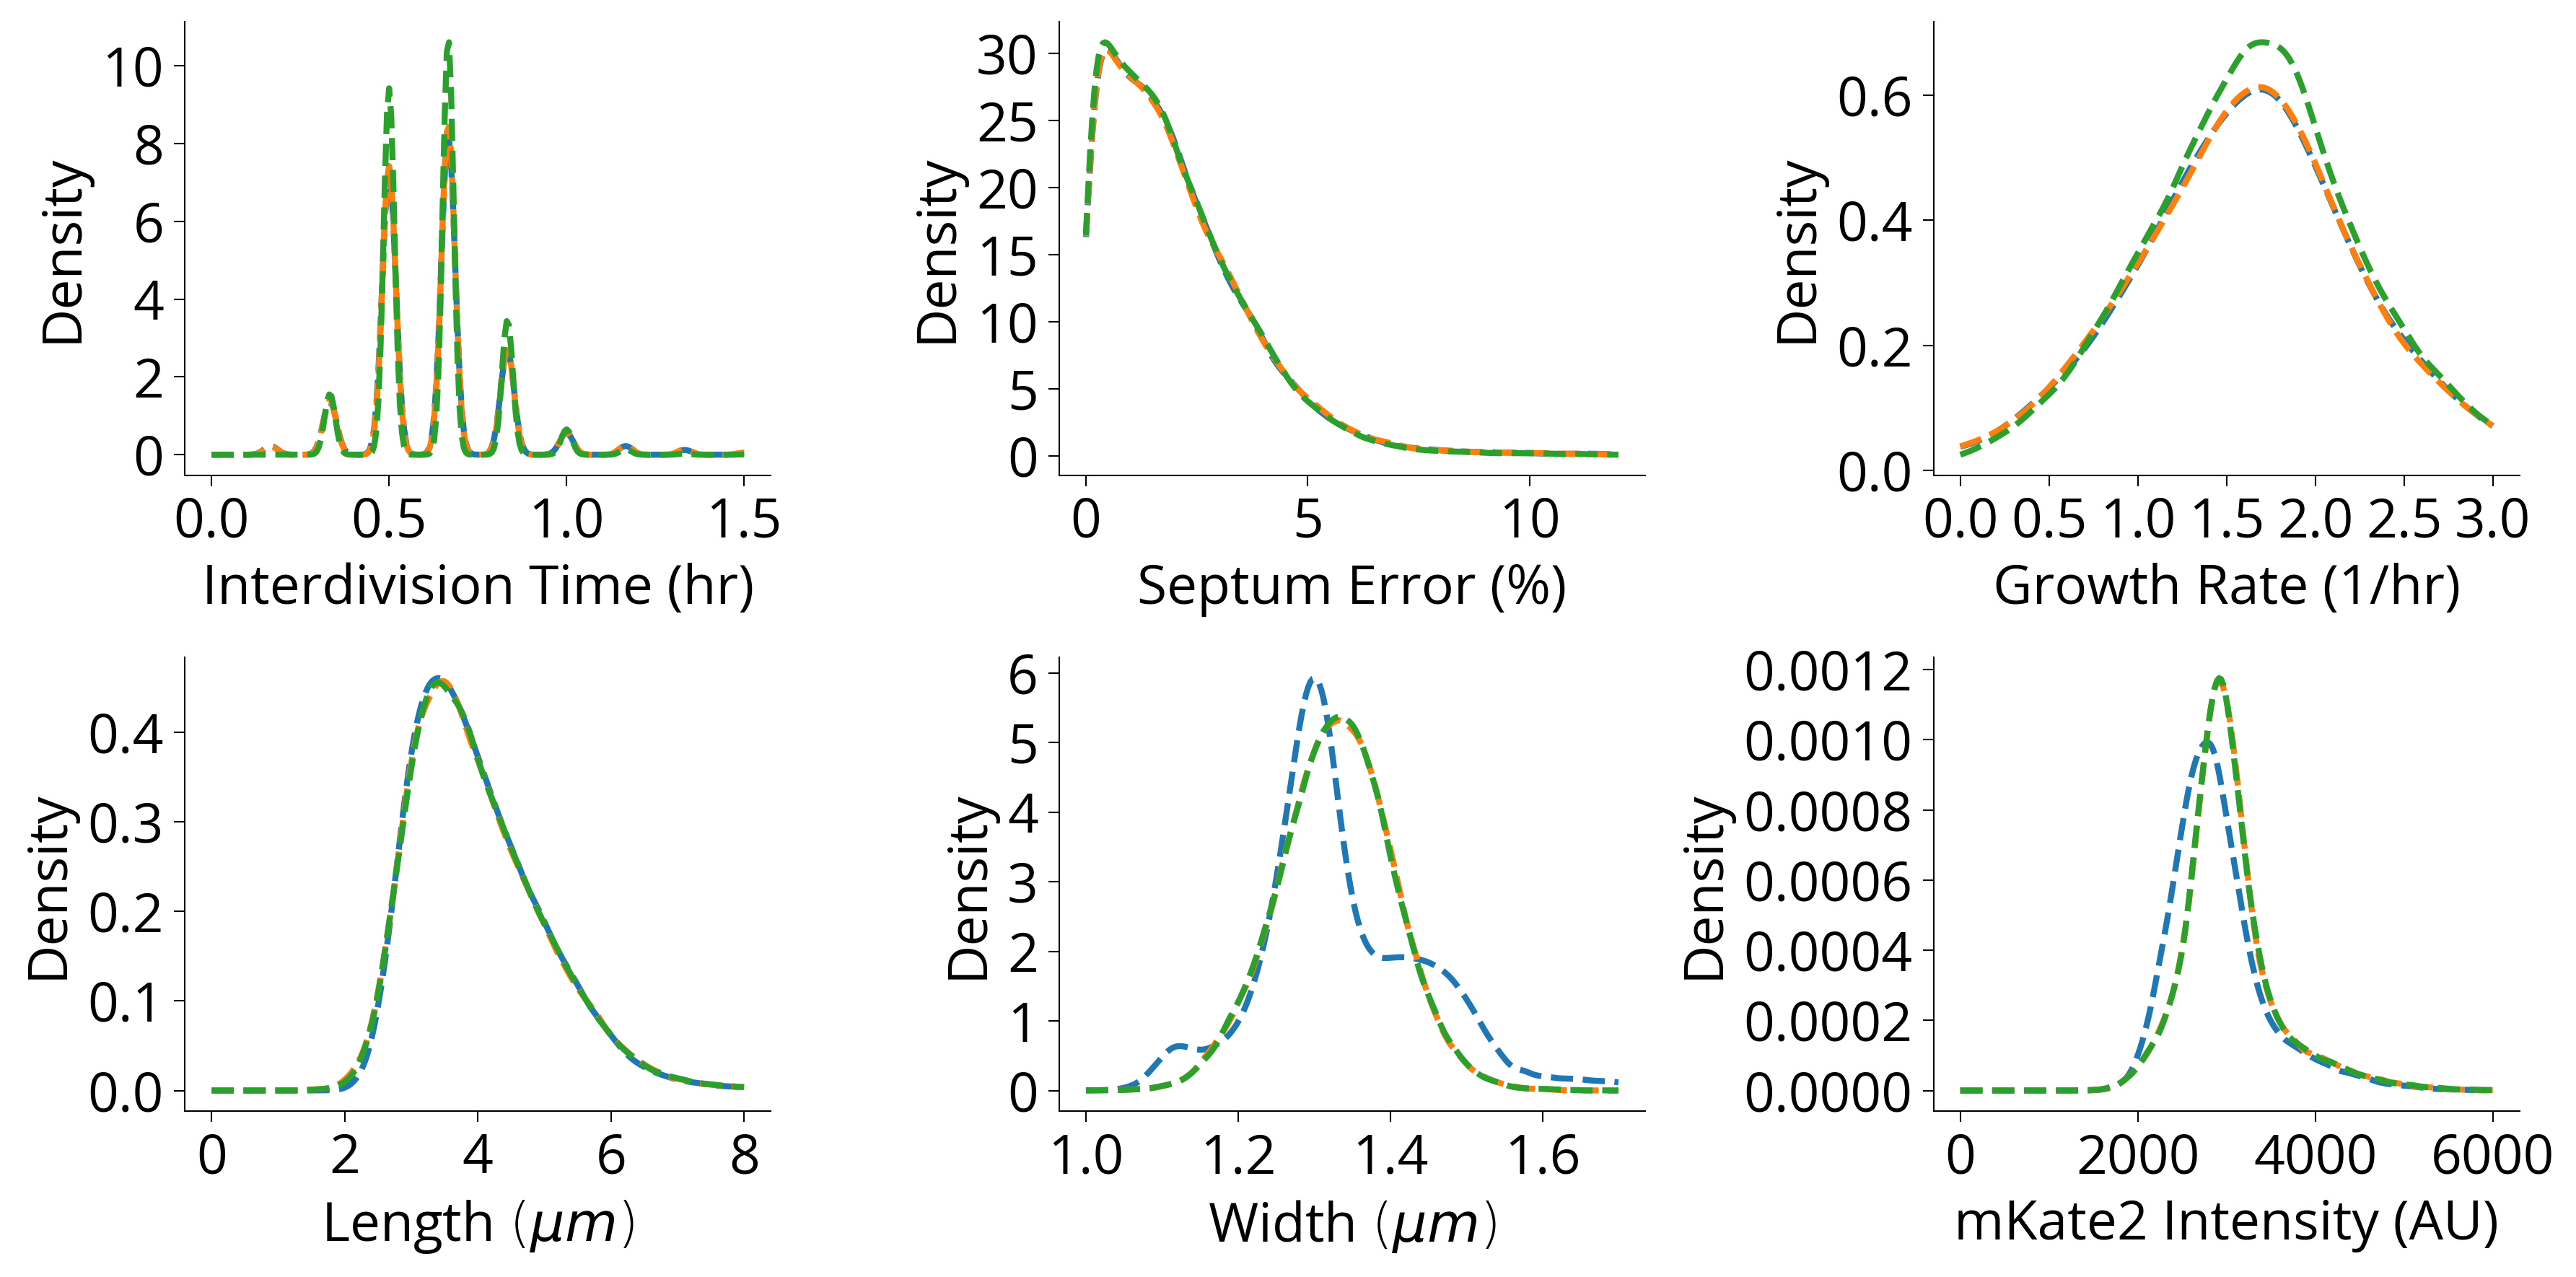

In [7]:
nfig = plt.figure(figsize=(12,6))

for i,value in enumerate(values_to_rescale):
    param_name = title_list[i]
    pheno_range = pheno_ranges[i]
    pheno_tick = pheno_ticks[i]
    kde_density = kde_density_list[i]
    histogram_data = histogram_data_list[i]
    
    pheno_domain = np.linspace(pheno_range[0],pheno_range[1],num=kde_density)
    if param_name == "Septum Error (%)":
        pheno_domain = pheno_domain*100
    
    plt.subplot(2,3,i+1)
    for key in histogram_data.keys():
        kde_points = histogram_data[key]
        plt.plot(pheno_domain,kde_points,linewidth=2,linestyle="--",label=key)

    plt.ylabel("Density", fontsize=18)
    plt.xlabel(param_name, fontsize=18)
    plt.xticks(pheno_tick,fontsize=18)
    plt.yticks(fontsize=18)
    sns.despine()
plt.tight_layout()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/S3/Param_Densities.png", dpi=300, transparent=True)

## Figure 3C

#### Load Checkpoint

In [8]:
values_to_rescale = ['Delta time (hr)','Septum Displacement Length Normalized','Instantaneous Growth Rate: Volume',\
                     'Length','Width','mCherry mean_intensity']
values_to_recale_dict = {'Cell Cycle':['Delta time (hr)','Septum Displacement Length Normalized'],\
                        'Timepoints':['Length','Width','mCherry mean_intensity'],\
                        'Growth':['Instantaneous Growth Rate: Volume']}
values_to_recale_inv_dict = {item:key for key,val in values_to_recale_dict.items() for item in val}

with open("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/DE32_Imaging/mean_grid_data_checkpoint.pkl", 'rb') as infile:
    merged_grid_means = pkl.load(infile)

In [9]:
## scale range 

title_list = [f"Interdivision\nTime (hr)","Septum Error (%)","Growth Rate (1/hr)",\
              "Length $(\mu m)$","Width $(\mu m)$",f"mKate2\nIntensity (AU)"]
pheno_ranges = [(0,1.5),(0,12),(0,3),(0,8),(1,1.7),(0,6000)]
pheno_ticks = [[0.,0.5,1.0,1.5],[0,5,10],[0.,0.5,1.0,1.5,2.,2.5,3.],\
               [0,2,4,6,8],[1,1.2,1.4,1.6],[0,2000,4000,6000]]
label_percentiles = [1,1,0.25,1,1,1,1,1]

median_vals_dict = {key:np.median(val) for key,val in merged_grid_means['Unscaled'].items()}

min_vals = []
max_vals = []
for i,label in enumerate(values_to_rescale):
    all_vals = np.stack([merged_grid_means['Unscaled'][label],merged_grid_means['Rescaled+Filtered'][label]])
    vmin,vmax = np.nanpercentile(all_vals,label_percentiles[i]),np.nanpercentile(all_vals,100-label_percentiles[i])
    vcenter = median_vals_dict[label]
    min_deviation,max_deviation = (vcenter-vmin,vmax-vcenter)
    if min_deviation>max_deviation:
        vmax = vcenter + min_deviation
    else:
        vmin = vcenter - max_deviation
    if label == 'Septum Displacement Length Normalized':
        vmin *= 100
        vmax *= 100
    print(label,vmin,vmax)
    min_vals.append(vmin)
    max_vals.append(vmax)

median_vals_dict['Septum Displacement Length Normalized'] *= 100

Delta time (hr) 0.5989877989166288 0.6582002733081564
Septum Displacement Length Normalized 1.5979946079517675 2.64134312421157
Instantaneous Growth Rate: Volume 1.2623032512052814 1.6888570983831988
Length 3.5807597847420896 4.446092121600114
Width 1.2543644906552294 1.420824682715519
mCherry mean_intensity 2660.4514437812513 3122.8727065516687


### Mean Distribution

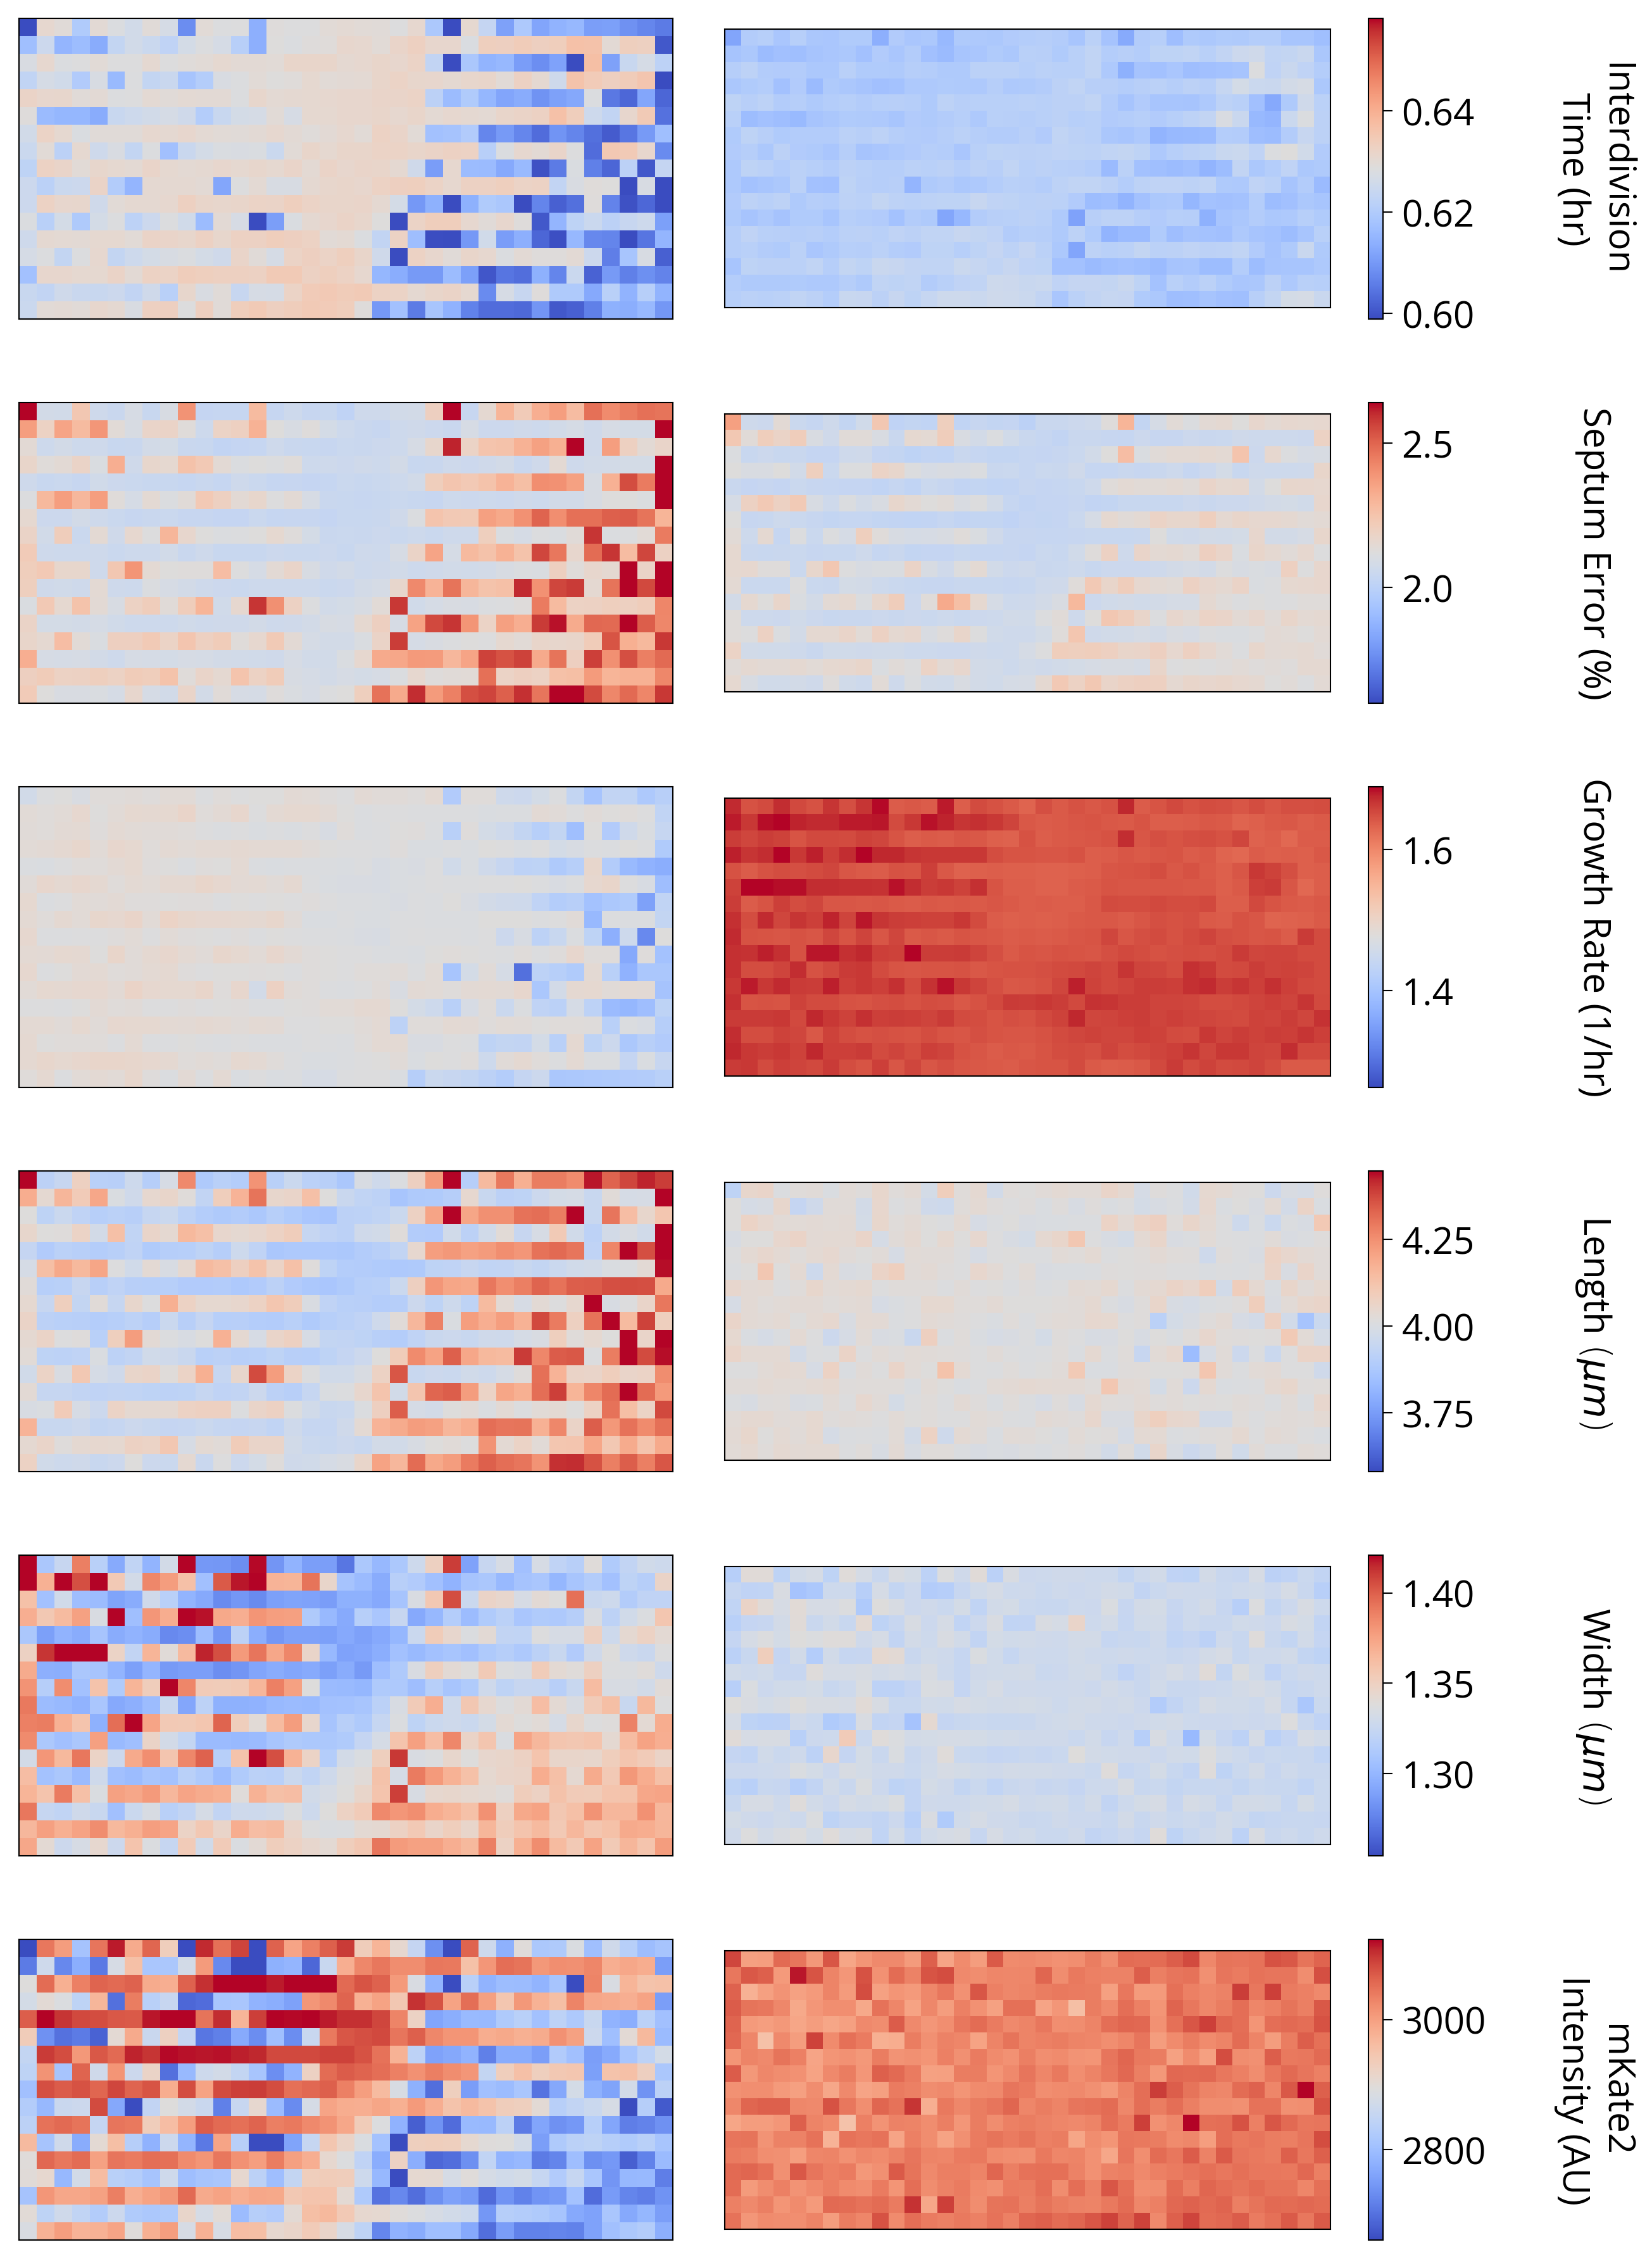

In [10]:
fig,axes = plt.subplots(6,2,figsize=(9,12))

scaling = 'Unscaled'
for val_i,val in enumerate(values_to_rescale):
    ax = axes[val_i,0]
    grid_values = copy.deepcopy(merged_grid_means[scaling][val])
    if title_list[val_i] == "Septum Error (%)":
        grid_values = grid_values*100
    
    img = ax.imshow(grid_values,vmin=min_vals[val_i],vmax=max_vals[val_i],cmap="coolwarm")
    ax.tick_params(labelsize=16)
    ax.set_yticks([])
    ax.set_xticks([])

scaling = 'Rescaled+Filtered'
for val_i,val in enumerate(values_to_rescale):
    ax = axes[val_i,1]
    grid_values = copy.deepcopy(merged_grid_means[scaling][val])
    if title_list[val_i] == "Septum Error (%)":
        grid_values = grid_values*100
        
    img = ax.imshow(grid_values,vmin=min_vals[val_i],vmax=max_vals[val_i],cmap="coolwarm")
    # ax.set_title(title_list[val_i],fontsize=14)
    ax.tick_params(labelsize=16)
    cbar = plt.colorbar(img,ax=ax)
    # cbar.set_ticks(pheno_ticks[val_i])
    cbar.ax.tick_params(labelsize=14)
    # Add a label to the colorbar
    cbar.ax.text(15, 0.5, title_list[val_i], va='center', ha='center', rotation=270,\
                 fontsize=14,transform=cbar.ax.transAxes)
    ax.set_yticks([])
    ax.set_xticks([])
    
plt.tight_layout()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/S3/Chip_Mean_Distributions_V2.png", dpi=300, transparent=True)

## Figure 3D

#### Load Dataframes

In [11]:
rootpath = "/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/lDE20_Imaging/"
df_prefix = "2024-01-25_lDE20_"

chip_section_df = []
for chip_section in ["Top","Bottom","Right","Left"]:
    chip_section_path = rootpath + "Chip_Section_Analysis/" + chip_section + "/" + df_prefix
    loaded_chip_section = pd.read_pickle(chip_section_path + "Steady_State_df_Estimators_wStats.pkl")
    loaded_chip_section["Chip Sector"] = chip_section
    ## to fix weird typing bug, dont understand why this fixes it
    loaded_chip_section = loaded_chip_section[loaded_chip_section.columns]
    ##
    chip_section_df.append(loaded_chip_section)
chip_section_df = pd.concat(chip_section_df)
chip_section_df = chip_section_df.loc["Mean (Robust)"]

experiments_df = []
experiments_list = [0,1,2,3]
for experiment_i in experiments_list:
    experiment_path =  rootpath + "Repeat_Analysis/Experiment_" + str(experiment_i) + "/" + df_prefix
    loaded_experiment = pd.read_pickle(experiment_path + "Steady_State_df_Estimators_wStats.pkl")
    loaded_experiment["Experiment #"] = experiment_i
    ## to fix weird typing bug, dont understand why this fixes it
    loaded_experiment = loaded_experiment[loaded_experiment.columns]
    ##
    experiments_df.append(loaded_experiment)
experiments_df = pd.concat(experiments_df)
experiments_df = experiments_df.loc["Mean (Robust)"]

In [12]:
params_of_interest = ['Length','Width','mCherry mean_intensity']
prolif_params = []
param_names = [r"Length ($ \mu m $)",r"Width ($ \mu m $)","mKate2 (AU)"]
param_ranges = [(0.,10.),(1.,1.6),(0,9000)]
param_ticks = [[0,2,4,6,8,10],[1.,1.2,1.4,1.6],[0,3000,6000,9000]]

min_n_observations = 8
mean_frac_sem_thr = 0.2

chip_section_df["SEM/Location"] = (np.sqrt(chip_section_df["Estimator Variance"])/chip_section_df["Value"]).copy()
chip_section_df = chip_section_df[chip_section_df["SEM/Location"]<mean_frac_sem_thr]
chip_section_df = chip_section_df.reset_index().set_index(["Chip Sector","oDEPool7_id"])
##hack to get both observatoins and proliferating observations (was broken)
observation_df = chip_section_df[chip_section_df["Variable(s)"] == "Length"][["N Observations"]]
chip_section_df = chip_section_df[["Variable(s)","Value"]]
chip_section_df = chip_section_df.pivot(columns=["Variable(s)"])
chip_section_df.columns = chip_section_df.columns.droplevel(0)
chip_section_df = chip_section_df.join(observation_df,on=['Chip Sector', 'oDEPool7_id'])

experiments_df["SEM/Location"] = (np.sqrt(experiments_df["Estimator Variance"])/experiments_df["Value"]).copy()
experiments_df = experiments_df[experiments_df["SEM/Location"]<mean_frac_sem_thr]
experiments_df = experiments_df.reset_index().set_index(["Experiment #","oDEPool7_id"])
##hack to get both observatoins and proliferating observations (was broken)
observation_df = experiments_df[experiments_df["Variable(s)"] == "Length"][["N Observations"]]
experiments_df = experiments_df[["Variable(s)","Value"]]
experiments_df = experiments_df.pivot(columns=["Variable(s)"])
experiments_df.columns = experiments_df.columns.droplevel(0)
experiments_df = experiments_df.join(observation_df,on=['Experiment #', 'oDEPool7_id'])

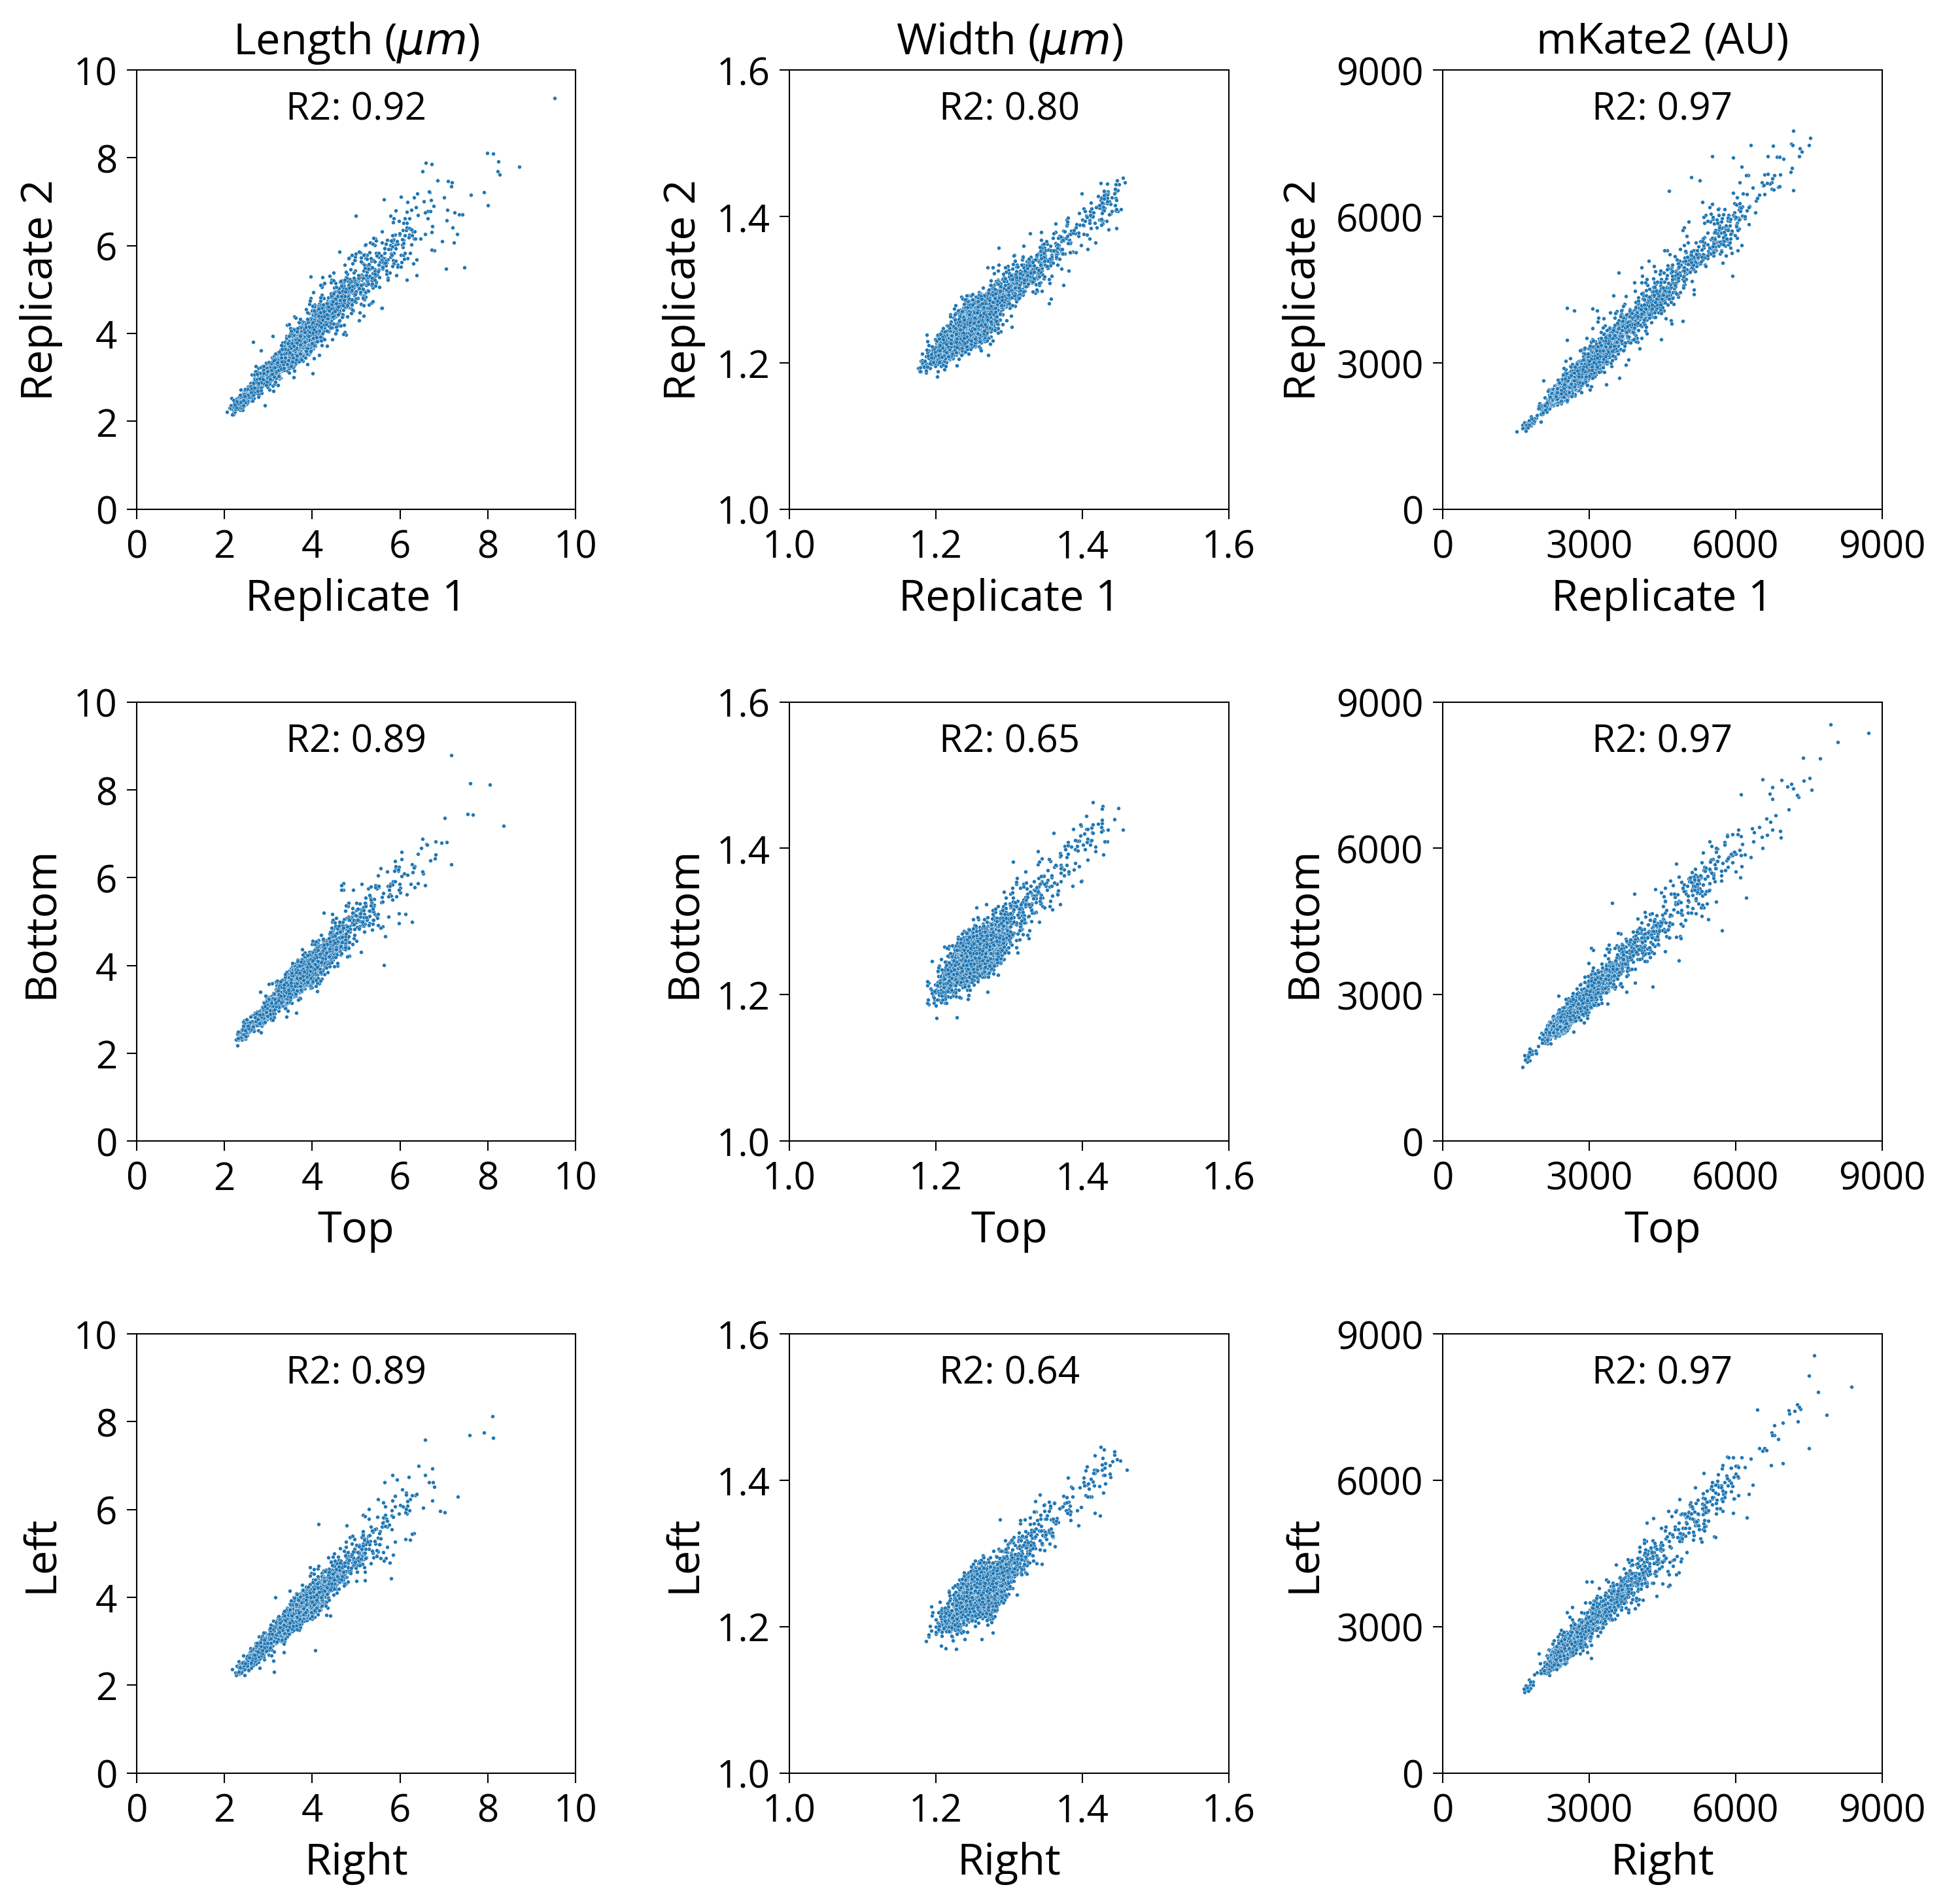

In [13]:
comparison_tuple = (2,3)
# exp_sorted_df = below_sem_thr_df.reset_index().set_index(["Experiment #","oDEPool7_id"]).sort_index()

fig, axs = plt.subplots(3,len(params_of_interest),figsize=(10,10))

exp_df_1 = experiments_df.loc[comparison_tuple[0]]
exp_df_1 = exp_df_1.rename(columns={column: column + ": 1" for column in exp_df_1.columns})
exp_df_2 = experiments_df.loc[comparison_tuple[1]]
exp_df_2 = exp_df_2.rename(columns={column: column + ": 2" for column in exp_df_2.columns})
compare_exp_df = pd.concat([exp_df_1,exp_df_2], axis=1)

sectors_df_top = chip_section_df.loc["Top"]
sectors_df_top = sectors_df_top.rename(columns={column: column + ": Top" for column in sectors_df_top.columns})
sectors_df_bottom = chip_section_df.loc["Bottom"]
sectors_df_bottom = sectors_df_bottom.rename(columns={column: column + ": Bottom" for column in sectors_df_bottom.columns})
compare_topbottom_df = pd.concat([sectors_df_top,sectors_df_bottom], axis=1)

sectors_df_right = chip_section_df.loc["Right"]
sectors_df_right = sectors_df_right.rename(columns={column: column + ": Right" for column in sectors_df_right.columns})
sectors_df_left = chip_section_df.loc["Left"]
sectors_df_left = sectors_df_left.rename(columns={column: column + ": Left" for column in sectors_df_left.columns})
compare_rightleft_df = pd.concat([sectors_df_right,sectors_df_left], axis=1)

for i,param in enumerate(params_of_interest):
    param_name = param_names[i]
    minv,maxv = param_ranges[i]

    compare_exp_df_sub = compare_exp_df[[param + ": 1",param + ": 2",\
                        "N Observations: 1",\
                        "N Observations: 2"]]
    compare_topbottom_df_sub = compare_topbottom_df[[param + ": Top",param + ": Bottom",\
                        "N Observations: Top",\
                        "N Observations: Bottom"]]
    compare_rightleft_df_sub = compare_rightleft_df[[param + ": Right",param + ": Left",\
                        "N Observations: Right",\
                        "N Observations: Left"]]

    compare_exp_df_sub = compare_exp_df_sub[(compare_exp_df_sub["N Observations: 1"]>=min_n_observations)&\
                                            (compare_exp_df_sub["N Observations: 2"]>=min_n_observations)]
    compare_topbottom_df_sub = compare_topbottom_df_sub[(compare_topbottom_df_sub["N Observations: Top"]>=min_n_observations)&\
                                            (compare_topbottom_df_sub["N Observations: Bottom"]>=min_n_observations)]
    compare_rightleft_df_sub = compare_rightleft_df_sub[(compare_rightleft_df_sub["N Observations: Right"]>=min_n_observations)&\
                                            (compare_rightleft_df_sub["N Observations: Left"]>=min_n_observations)]
    
    compare_exp_df_sub = compare_exp_df_sub.dropna(axis=0)
    compare_topbottom_df_sub = compare_topbottom_df_sub.dropna(axis=0)
    compare_rightleft_df_sub = compare_rightleft_df_sub.dropna(axis=0)
    
    ax = axs[0,i]
    ax.set_aspect('equal')
    sns.scatterplot(compare_exp_df_sub,x=param + ": 1",y=param + ": 2",\
                    s=2,ax=ax)
    ax.set_title(param_name,fontsize=16)
    ax.set_xlabel("Replicate 1",fontsize=16)
    ax.set_ylabel("Replicate 2",fontsize=16)
    ax.set_ylim(minv,maxv)
    ax.set_xlim(minv,maxv)
    ax.set_xticks(param_ticks[i])
    ax.set_yticks(param_ticks[i])

    ax.tick_params(axis='both', direction='out', labelsize=14)
    correlation_matrix = np.corrcoef(compare_exp_df_sub[param + ": 1"].values,\
                                     compare_exp_df_sub[param + ": 2"].values)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    ax.text(0.5, 0.91, 'R2: ' + f'{r_squared:.2f}', horizontalalignment='center', verticalalignment='center', \
            transform=ax.transAxes, fontsize=14)

    ##Top and Bottom
    ax = axs[1,i]
    ax.set_aspect('equal')
    # ax = plt.subplot(len(experiment_list),len(experiment_list),(experiment_i+1) + (experiment_j)*len(experiment_list))
    sns.scatterplot(compare_topbottom_df_sub,x=param + ": Top",y=param + ": Bottom",\
                    s=2,ax=ax)
    ax.set_xlabel("Top",fontsize=16)
    ax.set_ylabel("Bottom",fontsize=16)
    ax.set_ylim(minv,maxv)
    ax.set_xlim(minv,maxv)
    ax.set_xticks(param_ticks[i])
    ax.set_yticks(param_ticks[i])

    ax.tick_params(axis='both', direction='out', labelsize=14)
    correlation_matrix = np.corrcoef(compare_topbottom_df_sub[param + ": Top"].values,\
                                     compare_topbottom_df_sub[param + ": Bottom"].values)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    ax.text(0.5, 0.91, 'R2: ' + f'{r_squared:.2f}', horizontalalignment='center', verticalalignment='center', \
            transform=ax.transAxes, fontsize=14)

    ##Right and Left
    ax = axs[2,i]
    ax.set_aspect('equal')
    # ax = plt.subplot(len(experiment_list),len(experiment_list),(experiment_i+1) + (experiment_j)*len(experiment_list))
    sns.scatterplot(compare_rightleft_df_sub,x=param + ": Right",y=param + ": Left",\
                    s=2,ax=ax)
    ax.set_xlabel("Right",fontsize=16)
    ax.set_ylabel("Left",fontsize=16)
    ax.set_ylim(minv,maxv)
    ax.set_xlim(minv,maxv)
    ax.set_xticks(param_ticks[i])
    ax.set_yticks(param_ticks[i])

    ax.tick_params(axis='both', direction='out', labelsize=14)
    correlation_matrix = np.corrcoef(compare_rightleft_df_sub[param + ": Right"].values,\
                                     compare_rightleft_df_sub[param + ": Left"].values)

    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    ax.text(0.5, 0.91, 'R2: ' + f'{r_squared:.2f}', horizontalalignment='center', verticalalignment='center', \
            transform=ax.transAxes, fontsize=14)

plt.tight_layout()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/S3/R2_Replicates_Positions.png", dpi=500)

## Figure 3E

In [14]:
cell_cycle_df = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Validation_Imaging/lDE20_Cell_Cycle_df.csv")
timepoints_df = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Validation_Imaging/lDE20_Timepoints_df.csv")
growth_df = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Validation_Imaging/lDE20_Growth_df.csv")

control_cell_cycle_df = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Validation_Imaging/Isolate_Cell_Cycle_df.csv")
control_timepoints_df = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Validation_Imaging/Isolate_Timepoints_df.csv")
control_growth_df = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Validation_Imaging/Isolate_Growth_df.csv")

In [15]:
pheno_labels = ["Delta time (hr)","Septum Displacement Length Normalized","Length",\
                "Width","mCherry mean_intensity","Instantaneous Growth Rate: Volume"]
title_list = [f"Interdivision\nTime (hr)","Septum Error (%)","Length $(\mu m)$","Width $(\mu m)$",\
              f"mKate2\nIntensity (AU)",f"Growth\nRate (1/hr)"]
df_type_order = ["Cell Cycle","Cell Cycle","Timepoints","Timepoints","Timepoints","Growth"]
gene_order = ["EV","rplA","dnaA","ftsN","mrdA"]
gene_title_list = ["EV","RplA","DnaA","FtsN","MrdA"]
hist_ranges = [(0,2),(0,0.12),(0,12),(1.1,1.5),(0,8000),(0,3.)]
hist_ticks = [[0.,0.5,1.0,1.5,2.0],[0.,5,10],[0,3,6,9,12],[1.1,1.2,1.3,1.4,1.5,1.6],\
              [0,2000,4000,6000,8000],[0.,1.,2.,3.]]

/tmp/ipykernel_29181/1262665976.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gene_title_list,fontsize=14)
/tmp/ipykernel_29181/1262665976.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gene_title_list,fontsize=14)
/tmp/ipykernel_29181/1262665976.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gene_title_list,fontsize=14)
/tmp/ipykernel_29181/1262665976.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gene_title_list,fontsize=14)
/tmp/ipykernel_29181/1262665976.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after se

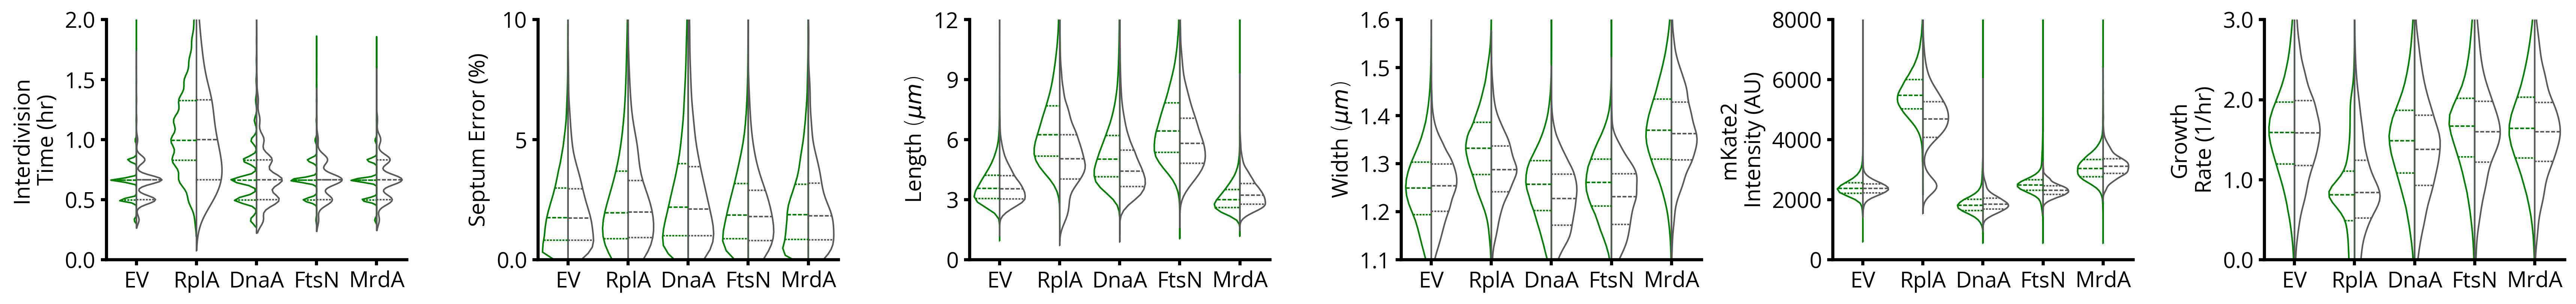

In [16]:
fig = plt.figure(figsize=(23,2.8))

for pheno_i,pheno_label in enumerate(pheno_labels):
    ax = plt.subplot(1,6,pheno_i+1)

    title = title_list[pheno_i]        
    hist_range = hist_ranges[pheno_i]
    hist_tick = hist_ticks[pheno_i]
    df_type = df_type_order[pheno_i]
    if df_type == "Cell Cycle":
        control_df = control_cell_cycle_df
        library_df = cell_cycle_df
    elif df_type == "Timepoints":
        control_df = control_timepoints_df
        library_df = timepoints_df
    elif df_type == "Growth":
        control_df = control_growth_df
        library_df = growth_df
    
    violin_df = pd.concat([control_df[["Experiment","Gene"]+[pheno_label]],library_df[["Experiment","Gene"]+[pheno_label]]]).reset_index()
    #remove GlyQ
    violin_df = violin_df[violin_df["Gene"].isin(gene_order)]
    # scale to control (similar to normalization in dataset)
    library_mean = np.mean(violin_df[(violin_df["Experiment"]=="lDE20")&(violin_df["Gene"]=="EV")][pheno_label])
    isolate_mean = np.mean(violin_df[(violin_df["Experiment"]=="Isolate")&(violin_df["Gene"]=="EV")][pheno_label])
    scaling_factor = library_mean/isolate_mean
    violin_df.loc[violin_df["Experiment"]=="Isolate",pheno_label] = violin_df.loc[violin_df["Experiment"]=="Isolate",pheno_label]*scaling_factor
    # Draw a nested violinplot and split the violins for easier comparison
    if title == "Septum Error (%)":
        violin_df[pheno_label] = violin_df[pheno_label]*100
    sns.violinplot(data=violin_df, x="Gene", y=pheno_label, hue="Experiment",
                   split=True, inner="quart", fill=False, density_norm="width",
                   palette={"Isolate": "g", "lDE20": ".35"}, ax=ax, 
                   legend=False, width=0.85, order=gene_order)
    ax.set_xlabel("")
    ax.set_ylabel(title,fontsize=14)
    ax.set_ylim(hist_range)
    ax.set_yticks(hist_tick,labels=hist_tick,fontsize=14)
    ax.set_xticklabels(gene_title_list,fontsize=14)

    # Adjust the thickness of axes
    plt.gca().spines['left'].set_linewidth(2)  # Left spine
    plt.gca().spines['bottom'].set_linewidth(2)  # Bottom spine
    # Adjust tick thickness
    plt.tick_params(width=2)  # This applies to all ticks

    sns.despine()
plt.tight_layout()
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/S3/Validation_Distribution_Horizontal.png",dpi=500)